### 1. Load Features, Names, and Labels

In [1]:
import numpy as np

In [2]:
train_features_path =  "../feature/BENGALI-feature/train_features_triplet_loss_set.npy"
train_names_path = "../feature/BENGALI-feature/train_names.npy"
train_labels_path = "../feature/BENGALI-feature/train_labels.npy"

test_features_path = "../feature/BENGALI-feature/test_features_triplet_loss_set.npy"
test_names_path = "../feature/BENGALI-feature/test_names.npy"
test_labels_path = "../feature/BENGALI-feature/test_labels.npy"

validation_features_path = "../feature/BENGALI-feature/validation_features_triplet_loss_set.npy"
validation_names_path = "../feature/BENGALI-feature/validation_names.npy"
validation_labels_path = "../feature/BENGALI-feature/validation_labels.npy"

In [3]:
train_features = np.load(train_features_path)
train_names = np.load(train_names_path)
train_labels = np.load(train_labels_path)

test_features = np.load(test_features_path)
test_names = np.load(test_names_path)
test_labels = np.load(test_labels_path)

validation_features = np.load(validation_features_path)
validation_names = np.load(validation_names_path)
validation_labels = np.load(validation_labels_path)

In [4]:
print("train_features shape : ", train_features.shape)
print("test_features shape : ", test_features.shape)
print("validation_features shape : ", validation_features.shape)

train_features shape :  (3200, 512)
test_features shape :  (1100, 512)
validation_features shape :  (1100, 512)


### Feature Gallery

In [5]:
# Feature Gallery dilakukan untuk setiap kelas / nama seperti "001", "002", "003", dst dengan cara mengambil data training positive dan mengambil mean / rata-rata dari data tersebut
def create_feature_gallery(train_features, train_names, train_labels):
    gallery_feature = []
    gallery_name = []

    unique_names = set(train_names.flatten())
    sorted_names = sorted(unique_names)

    for name in sorted_names:
        # print(name)
        # print(name)
        name_features = []

        for feature, feature_name, label in zip(train_features, train_names, train_labels):
            # print(feature, feature_name, label)
            if name in feature_name and label == 1:
                name_features.append(feature)

        if name_features:
            # print(name_features)
            average_feature = np.mean(name_features, axis=0)
            gallery_feature.append(average_feature)
            gallery_name.append(name)

    return gallery_feature, gallery_name

In [6]:
gallery_features, gallery_names = create_feature_gallery(train_features, train_names, train_labels)

In [7]:
gallery_feature_path = "../feature/BENGALI-feature/gallery_features_triplet_loss_set.npy"
gallery_name_path = "../feature/BENGALI-feature/gallery_names.npy"

In [8]:
np.save(gallery_feature_path, gallery_features)
np.save(gallery_name_path, gallery_names)

In [9]:
gallery_features = np.load(gallery_feature_path)
gallery_names = np.load(gallery_name_path)

In [10]:
gallery_features_array = np.array(gallery_features)
print("gallery features shape : ", gallery_features_array.shape)

gallery features shape :  (100, 512)


### Euclidean Distance

In [11]:
def euclidean_distance(feature_vector1, feature_vector2):
    return np.sqrt(np.sum((feature_vector1 - feature_vector2)**2))

In [12]:
def find_euclidean_distance(test_features, test_names, test_labels, gallery_features, gallery_names):
    euclidean_distances = []
    euclidean_names = []
    euclidean_actual_labels = []

    for gallery_feature, gallery_name in zip(gallery_features, gallery_names):
        curr_euclid_name = gallery_name
        curr_euclid_feature = []
        curr_euclid_label = []
        curr_euclid_dist = []
        for feature, name, label in zip(test_features, test_names, test_labels):
            if gallery_name in name:
                curr_euclid_feature.append(feature)
                curr_euclid_label.append(label)
        
        for feature in curr_euclid_feature:
            distance = euclidean_distance(feature, gallery_feature)
            curr_euclid_dist.append(distance)

        euclidean_distances.append(curr_euclid_dist)
        euclidean_names.append(curr_euclid_name)
        euclidean_actual_labels.append(curr_euclid_label)
        
    return euclidean_distances, euclidean_names, euclidean_actual_labels

In [13]:
test_euclidean_distances, test_euclidean_names, test_euclidean_actual_labels = find_euclidean_distance(test_features, test_names, test_labels, gallery_features, gallery_names)
train_euclidean_distances, train_euclidean_names, train_euclidean_actual_labels = find_euclidean_distance(train_features, train_names, train_labels, gallery_features, gallery_names)
validation_euclidean_distances, validation_euclidean_names, validation_euclidean_actual_labels = find_euclidean_distance(validation_features, validation_names, validation_labels, gallery_features, gallery_names)

### Split Euclidean Distance to Positive and Negative for Future Use (If needed)

In [14]:
def split_euc_dist(euclidean_distances, euclidean_names, euclidean_actual_labels):
    positive_distance = []
    positive_name = []
    positive_label = []
    negative_distance = []
    negative_name = []
    negative_label = []

    for euclidean_distance, euclidean_name, euclidean_actual_label in zip(euclidean_distances, euclidean_names, euclidean_actual_labels):
        pos_dist = []
        neg_dist = []
        pos_lab = []
        neg_lab = []
        for distance, label in zip(euclidean_distance, euclidean_actual_label):
            if label == 0:
                neg_dist.append(distance)
                neg_lab.append(label)
            else:
                pos_dist.append(distance)
                pos_lab.append(label)

        positive_distance.append(pos_dist)
        positive_name.append(euclidean_name)
        positive_label.append(pos_lab)

        negative_distance.append(neg_dist)
        negative_name.append(euclidean_name)
        negative_label.append(neg_lab)
        # print(euclidean_distance, euclidean_name, euclidean_actual_label)

    return positive_distance, negative_label

In [15]:
train_positive_dist, train_negative_dist = split_euc_dist(train_euclidean_distances, train_names, train_euclidean_actual_labels)
test_positive_dist, test_negative_dist = split_euc_dist(test_euclidean_distances, test_names, test_euclidean_actual_labels)
validation_positive_dist, validation_negative_dist = split_euc_dist(validation_euclidean_distances, validation_names, validation_euclidean_actual_labels)

In [16]:
flat_train_positive_dist = [item for sublist in train_positive_dist for item in sublist]
flat_train_negative_dist = [item for sublist in train_negative_dist for item in sublist]
flat_test_positive_dist = [item for sublist in test_positive_dist for item in sublist]
flat_test_negative_dist = [item for sublist in test_negative_dist for item in sublist]
flat_validation_positive_dist = [item for sublist in validation_positive_dist for item in sublist]
flat_validation_negative_dist = [item for sublist in validation_negative_dist for item in sublist]

print(f'Train total : {len(flat_train_positive_dist) + len(flat_train_negative_dist)}')
print(f'  Train pos : {len(flat_train_positive_dist)}')
print(f'  Train neg : {len(flat_train_negative_dist)}')
print(f' Test total : {len(flat_test_positive_dist) + len(flat_test_negative_dist)}')
print(f'   Test pos : {len(flat_test_positive_dist)}')
print(f'   Test neg : {len(flat_test_negative_dist)}')
print(f'  Val total : {len(flat_validation_positive_dist) + len(flat_validation_negative_dist)}')
print(f'    Val pos : {len(flat_validation_positive_dist)}')
print(f'    Val neg : {len(flat_validation_negative_dist)}')

Train total : 3200
  Train pos : 1400
  Train neg : 1800
 Test total : 1100
   Test pos : 500
   Test neg : 600
  Val total : 1100
    Val pos : 500
    Val neg : 600


### Normalize Euclidean Distance

In [17]:
# Flatten the lists of distances
flat_test_distances = [item for sublist in test_euclidean_distances for item in sublist]
flat_train_distances = [item for sublist in train_euclidean_distances for item in sublist]
flat_validation_distances = [item for sublist in validation_euclidean_distances for item in sublist]

In [18]:
print(flat_train_distances)

[2.3564658, 1.817248, 3.0652754, 1.9259838, 2.897042, 2.9264102, 1.2871333, 2.20469, 2.4378183, 3.3728793, 1.5499878, 1.2405527, 2.131109, 3.0766573, 6.041064, 6.1513968, 8.159332, 6.7689342, 6.692055, 8.159827, 7.2194576, 10.170307, 9.634204, 8.859629, 9.75008, 11.067301, 10.249133, 7.854541, 5.4153943, 7.083625, 9.854175, 9.230257, 1.8251327, 4.1955957, 2.4037132, 3.523241, 1.9115554, 2.2595766, 1.6165595, 1.494936, 2.0037897, 2.5625384, 1.5199151, 3.4373608, 3.2636597, 2.2877774, 6.252653, 8.654603, 7.7154465, 6.5882325, 6.252285, 5.7331614, 10.975403, 7.667892, 9.302595, 9.86663, 7.337766, 8.488062, 8.17181, 9.78592, 10.089329, 9.231876, 5.421312, 10.296324, 2.5164938, 3.9201386, 3.3106163, 3.801034, 2.9222245, 3.3151038, 3.9208379, 2.9222245, 4.450019, 3.801034, 3.3106163, 2.9222245, 4.450019, 3.801034, 9.20638, 8.950903, 6.2732096, 5.965215, 6.71654, 7.5533705, 5.205399, 4.603214, 5.899532, 7.0034046, 7.1900597, 6.5749645, 6.328943, 5.0855126, 5.363842, 5.70655, 5.7781177, 7.9190

In [19]:
def get_min_max(euclidean_distances):
    min_distance = min(euclidean_distances)
    max_distance = max(euclidean_distances)

    return min_distance, max_distance

In [20]:
min_val, max_val = get_min_max(flat_train_distances)
print(f'min: {min_val}, max: {max_val}')

min: 0.7262712717056274, max: 16.74356460571289


In [21]:
def normalize_distance(euclidean_distances, min_val, max_val):
    all_distance = []

    for distance in euclidean_distances:
        normalized_distance = (distance - min_val) / (max_val - min_val)

        # in case test and train distances are beyond max of train
        if normalized_distance > 1:
            normalized_distance = 1
        elif normalized_distance < 0:
            normalized_distance = 0
        
        all_distance.append(normalized_distance)

    return all_distance

def reverse_normalized_distance(euclidean_distances, min_val, max_val):
    reverse_distance = []
    normalized_distances = normalize_distance(euclidean_distances, min_val, max_val)
    for distance in normalized_distances:
        distance = -distance
        reverse_distance.append(distance)

    return reverse_distance

In [22]:
# normalized_positive_distances = reverse_normalized_distance(positive_distance)
# normalized_negative_distances = reverse_normalized_distance(negative_distance)

In [23]:
normalized_test_euclidean_distance = reverse_normalized_distance(flat_test_distances, min_val, max_val)
normalized_train_euclidean_distance = reverse_normalized_distance(flat_train_distances, min_val, max_val)
normalized_validation_euclidean_distance = reverse_normalized_distance(flat_validation_distances, min_val, max_val)

In [24]:
print(normalized_test_euclidean_distance)

[-0.054612074, -0.13146469, -0.08454076, -0.1271265, -0.089560434, -0.4455257, -0.5585649, -0.5495125, -0.44695696, -0.39965987, -0.49169254, -0.15342511, -0.12883352, -0.16327278, -0.12656562, -0.02271352, -0.4946916, -0.47654945, -0.32423094, -0.37076956, -0.41136536, -0.52353513, -0.25427553, -0.18546517, -0.23248295, -0.23981403, -0.16134717, -0.48466137, -0.39278427, -0.3635193, -0.45183343, -0.38071755, -0.23802918, -0.2722874, -0.14151971, -0.079735324, -0.18830024, -0.20871569, -0.5153277, -0.35319993, -0.23413287, -0.3723825, -0.3756248, -0.36793736, -0.13532221, -0.14553706, -0.24271382, -0.17971924, -0.13576242, -0.20142962, -0.21339343, -0.27782497, -0.32374978, -0.32427377, -0.23594724, -0.23820783, -0.11634846, -0.19892913, -0.11063678, -0.103696585, -0.12550369, -0.30768603, -0.3508847, -0.24759865, -0.35645416, -0.45234624, -0.10311225, -0.176132, -0.08911908, -0.21532144, -0.13494705, -0.49930173, -0.5242795, -0.49305394, -0.5242795, -0.5543484, -0.47175032, -0.0699282

# 3. ROC Curve

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

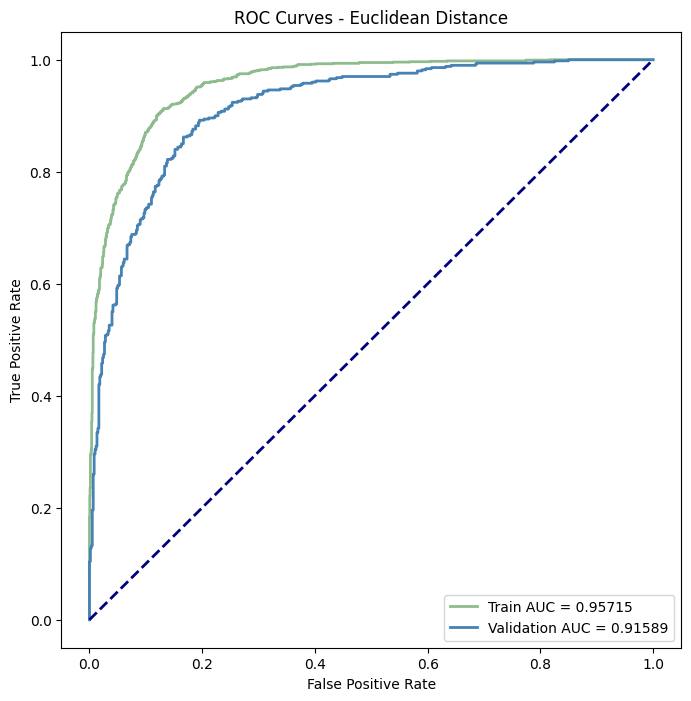

In [26]:
# Flatten the lists of labels
flat_test_labels = [item for sublist in test_euclidean_actual_labels for item in sublist]
flat_train_labels = [item for sublist in train_euclidean_actual_labels for item in sublist]
flat_validation_labels = [item for sublist in validation_euclidean_actual_labels for item in sublist]

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(flat_test_labels, normalized_test_euclidean_distance, drop_intermediate=False)
roc_auc_test = auc(fpr_test, tpr_test)
fpr_train, tpr_train, thresholds_train = roc_curve(flat_train_labels, normalized_train_euclidean_distance, drop_intermediate=False)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_validation, tpr_validation, thresholds_validation = roc_curve(flat_validation_labels, normalized_validation_euclidean_distance, drop_intermediate=False)
roc_auc_validation = auc(fpr_validation, tpr_validation)

# Plot ROC curve
plt.figure(figsize=(8, 8))

plt.plot(fpr_train, tpr_train, color='darkseagreen', lw=2, label=f'Train AUC = {roc_auc_train:.5f}')
plt.plot(fpr_validation, tpr_validation, color='steelblue', lw=2, label=f'Validation AUC = {roc_auc_validation:.5f}')
# plt.plot(fpr_test, tpr_test, color='peru', lw=2, label=f'Test AUC = {roc_auc_test:.5f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Euclidean Distance')
plt.legend(loc='lower right')
plt.show()

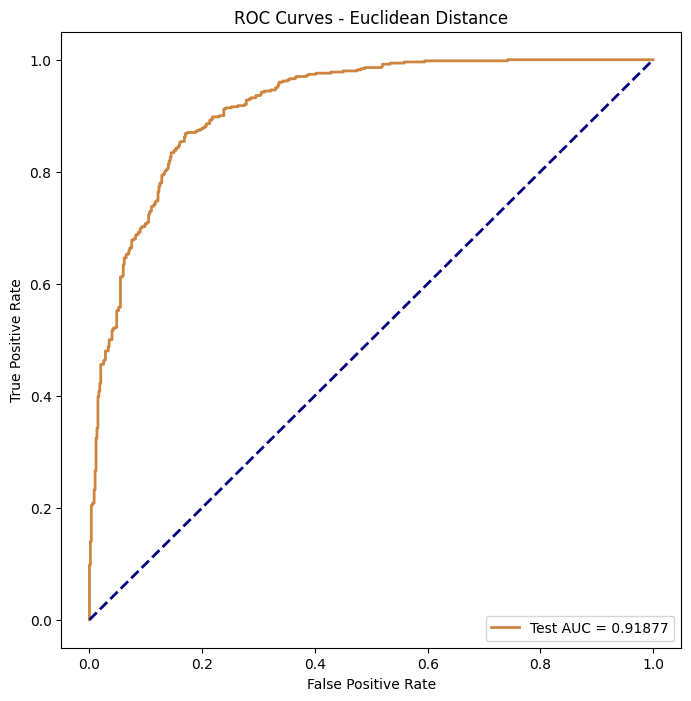

In [27]:
# Plot ROC curve
plt.figure(figsize=(8, 8))

# plt.plot(fpr_train, tpr_train, color='darkseagreen', lw=2, label=f'Train AUC = {roc_auc_train:.5f}')
# plt.plot(fpr_validation, tpr_validation, color='steelblue', lw=2, label=f'Validation AUC = {roc_auc_validation:.5f}')
plt.plot(fpr_test, tpr_test, color='peru', lw=2, label=f'Test AUC = {roc_auc_test:.5f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Euclidean Distance')
plt.legend(loc='lower right')
plt.show()

In [28]:
def find_tpr_at_fpr(fpr, tpr, target_fpr):
    return np.interp(target_fpr, fpr, tpr)

In [29]:
target_fprs = [0.1, 0.01, 0.001]
tpr_at_target_fpr_train = [find_tpr_at_fpr(fpr_train, tpr_train, fpr) for fpr in target_fprs]
tpr_at_target_fpr_test = [find_tpr_at_fpr(fpr_test, tpr_test, fpr) for fpr in target_fprs]
tpr_at_target_fpr_val = [find_tpr_at_fpr(fpr_validation, tpr_validation, fpr) for fpr in target_fprs]

In [30]:
print("Train")
for tpr, fpr in zip(tpr_at_target_fpr_train, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_train}')

print("Validation")
for tpr, fpr in zip(tpr_at_target_fpr_val, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_validation}')

print("Test")
for tpr, fpr in zip(tpr_at_target_fpr_test, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_test}')


Train
TPR at FPR 0.100: 0.871
TPR at FPR 0.010: 0.539
TPR at FPR 0.001: 0.221
             AUC: 0.9571480158730159
Validation
TPR at FPR 0.100: 0.734
TPR at FPR 0.010: 0.304
TPR at FPR 0.001: 0.104
             AUC: 0.9158933333333333
Test
TPR at FPR 0.100: 0.708
TPR at FPR 0.010: 0.266
TPR at FPR 0.001: 0.098
             AUC: 0.9187733333333333
